In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftfreq
from src.graficar import graficar_serie 

In [ ]:
ruta_df = 'data/raw_data/Vehicle.csv'
df = pd.read_csv(ruta_df)  
print(df.shape)
df.tail()

(1689, 2)


,Hour,Vehicles
1684,1685,194
1685,1686,373
1686,1687,1218
1687,1688,4076
1688,1689,5137


In [102]:
serie = pd.Series(df['Vehicles'].values)
print(type(serie))
print(f'serie shape: {serie.shape}')

<class 'pandas.core.series.Series'>
serie shape: (1689,)


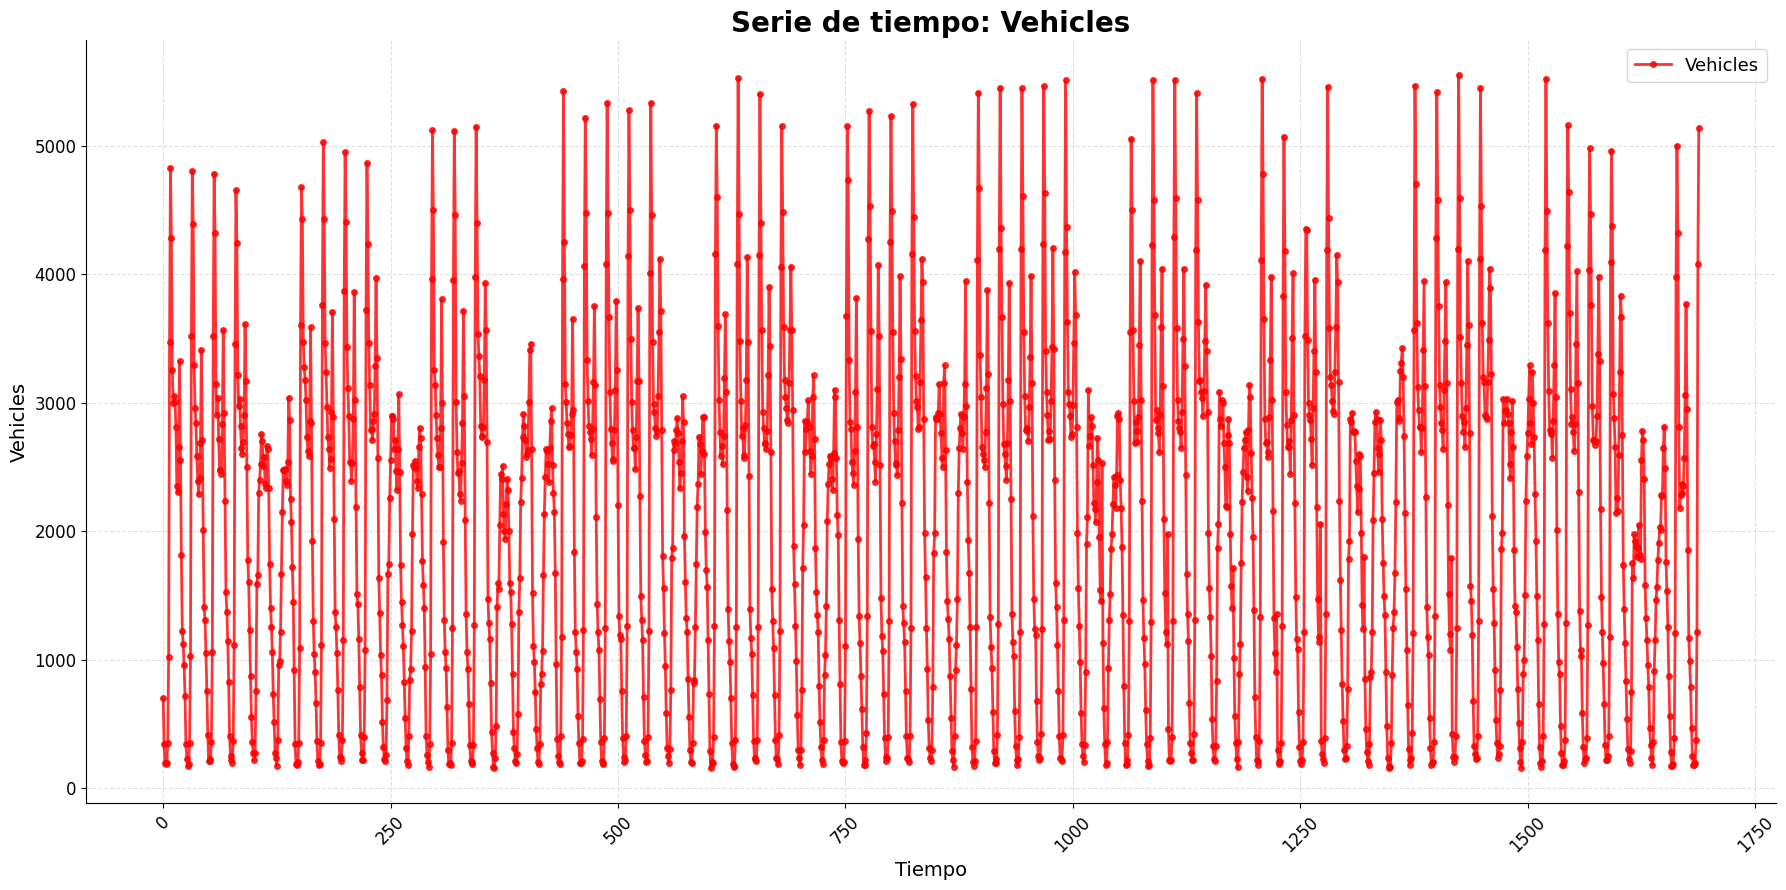

In [103]:
graficar_serie(df, 'Vehicles', color = 'red')

### Fourier

In [104]:
# FFT
N = len(serie)
d = 1  # intervalo temporal
fft_vals = fft(serie)
freqs = fftfreq(N, d)
magnitudes = np.abs(fft_vals)[:N//2]
freqs_pos = freqs[:N//2]

# ELiminar la priemra frecuencia
magnitudes_no_dc = magnitudes[1:]
freqs_no_dc = freqs_pos[1:]

# Ordenar las magnitudes de mayor a menor y tomar los índices de las 3 mayores
n_frecuencias = 4
indices_top = np.argsort(magnitudes_no_dc)[-n_frecuencias:][::-1]

# Obtener las 3 frecuencias y periodos dominantes
frecuencias_dominantes = freqs_no_dc[indices_top]
periodos_dominantes = 1 / frecuencias_dominantes

# Mostrar resultados
for i, (f, p) in enumerate(zip(frecuencias_dominantes, periodos_dominantes), 1):
    print(f"Frecuencia dominante #{i}: {f:.5f} (Periodo = {p:.2f})")


Frecuencia dominante #1: 0.04144 (Periodo = 24.13)
Frecuencia dominante #2: 0.08348 (Periodo = 11.98)
Frecuencia dominante #3: 0.04204 (Periodo = 23.79)
Frecuencia dominante #4: 0.12493 (Periodo = 8.00)


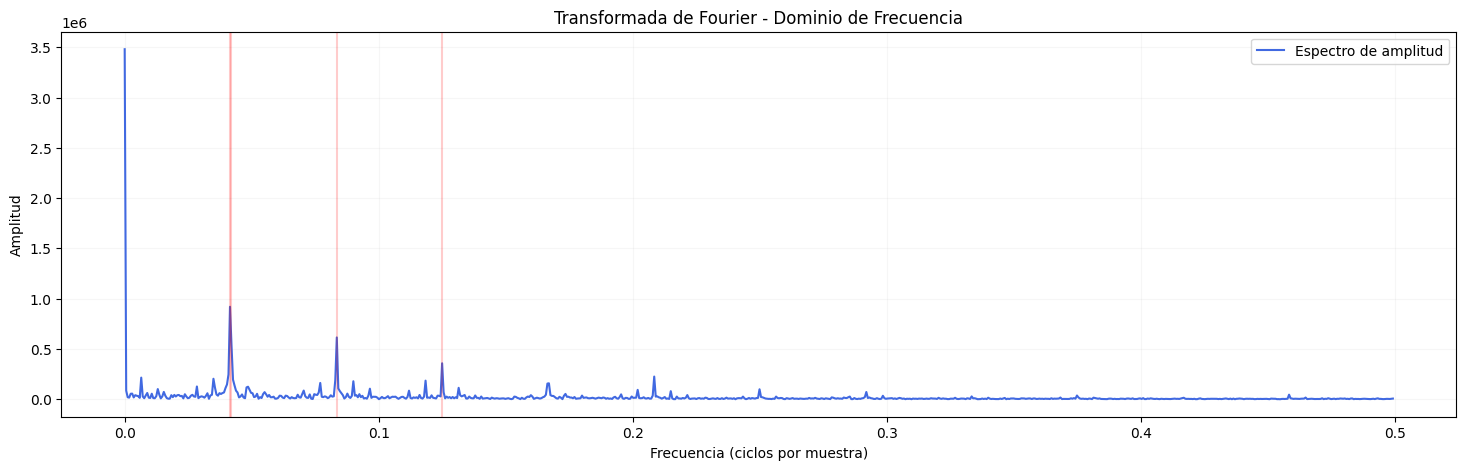

In [105]:
# === Gráfica ===
plt.figure(figsize=(18,5))
plt.plot(freqs_pos, magnitudes, color='royalblue', label='Espectro de amplitud')

# Líneas para las frecuencias dominantes
for f, p in zip(frecuencias_dominantes, periodos_dominantes):
    plt.axvline(f, color='red', linestyle='-', alpha=0.2)

plt.title("Transformada de Fourier - Dominio de Frecuencia")
plt.xlabel("Frecuencia (ciclos por muestra)")
plt.ylabel("Amplitud")
plt.grid(alpha=0.1)
plt.legend()
plt.show()

In [106]:
# Crear máscara para eliminar esas frecuencias
fft_filtered = fft_vals.copy()

for f in frecuencias_dominantes:
    # Encontrar índice positivo y negativo
    idx_pos = np.argmin(np.abs(freqs - f))
    idx_neg = np.argmin(np.abs(freqs + f))
    fft_filtered[idx_pos] = 0
    fft_filtered[idx_neg] = 0

# Reconstruir serie sin las frecuencias dominantes
serie_filtrada = np.real(ifft(fft_filtered))

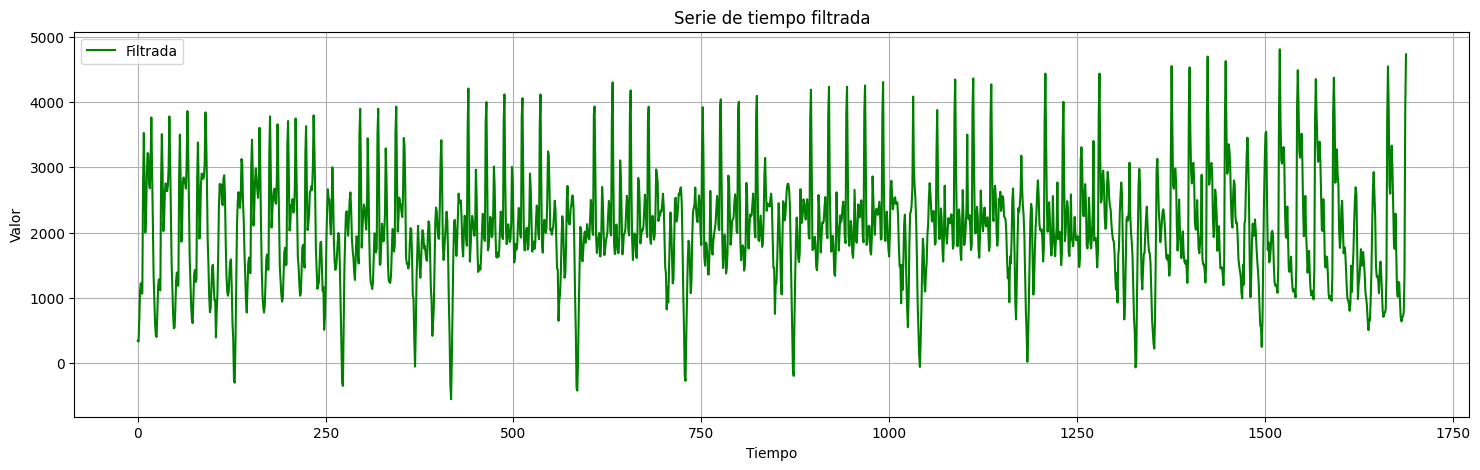

In [ ]:
plt.figure(figsize=(18, 5))
plt.plot(serie_filtrada, label='Filtrada', color='green', linestyle='-')
plt.title('Serie de tiempo filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

# Esta se ve que puede ser estacionaria o que al menos no tiene tendencia y tal vez ARIMA la puede trabaar